# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [60]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [61]:
df.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [62]:
df.isna().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [63]:
df = df.drop('Unnamed: 32', axis=1)

features = list(df.columns)
features.remove('id')

In [64]:
from sklearn.preprocessing import StandardScaler
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

std_df = pd.DataFrame(x, columns=features)
std_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


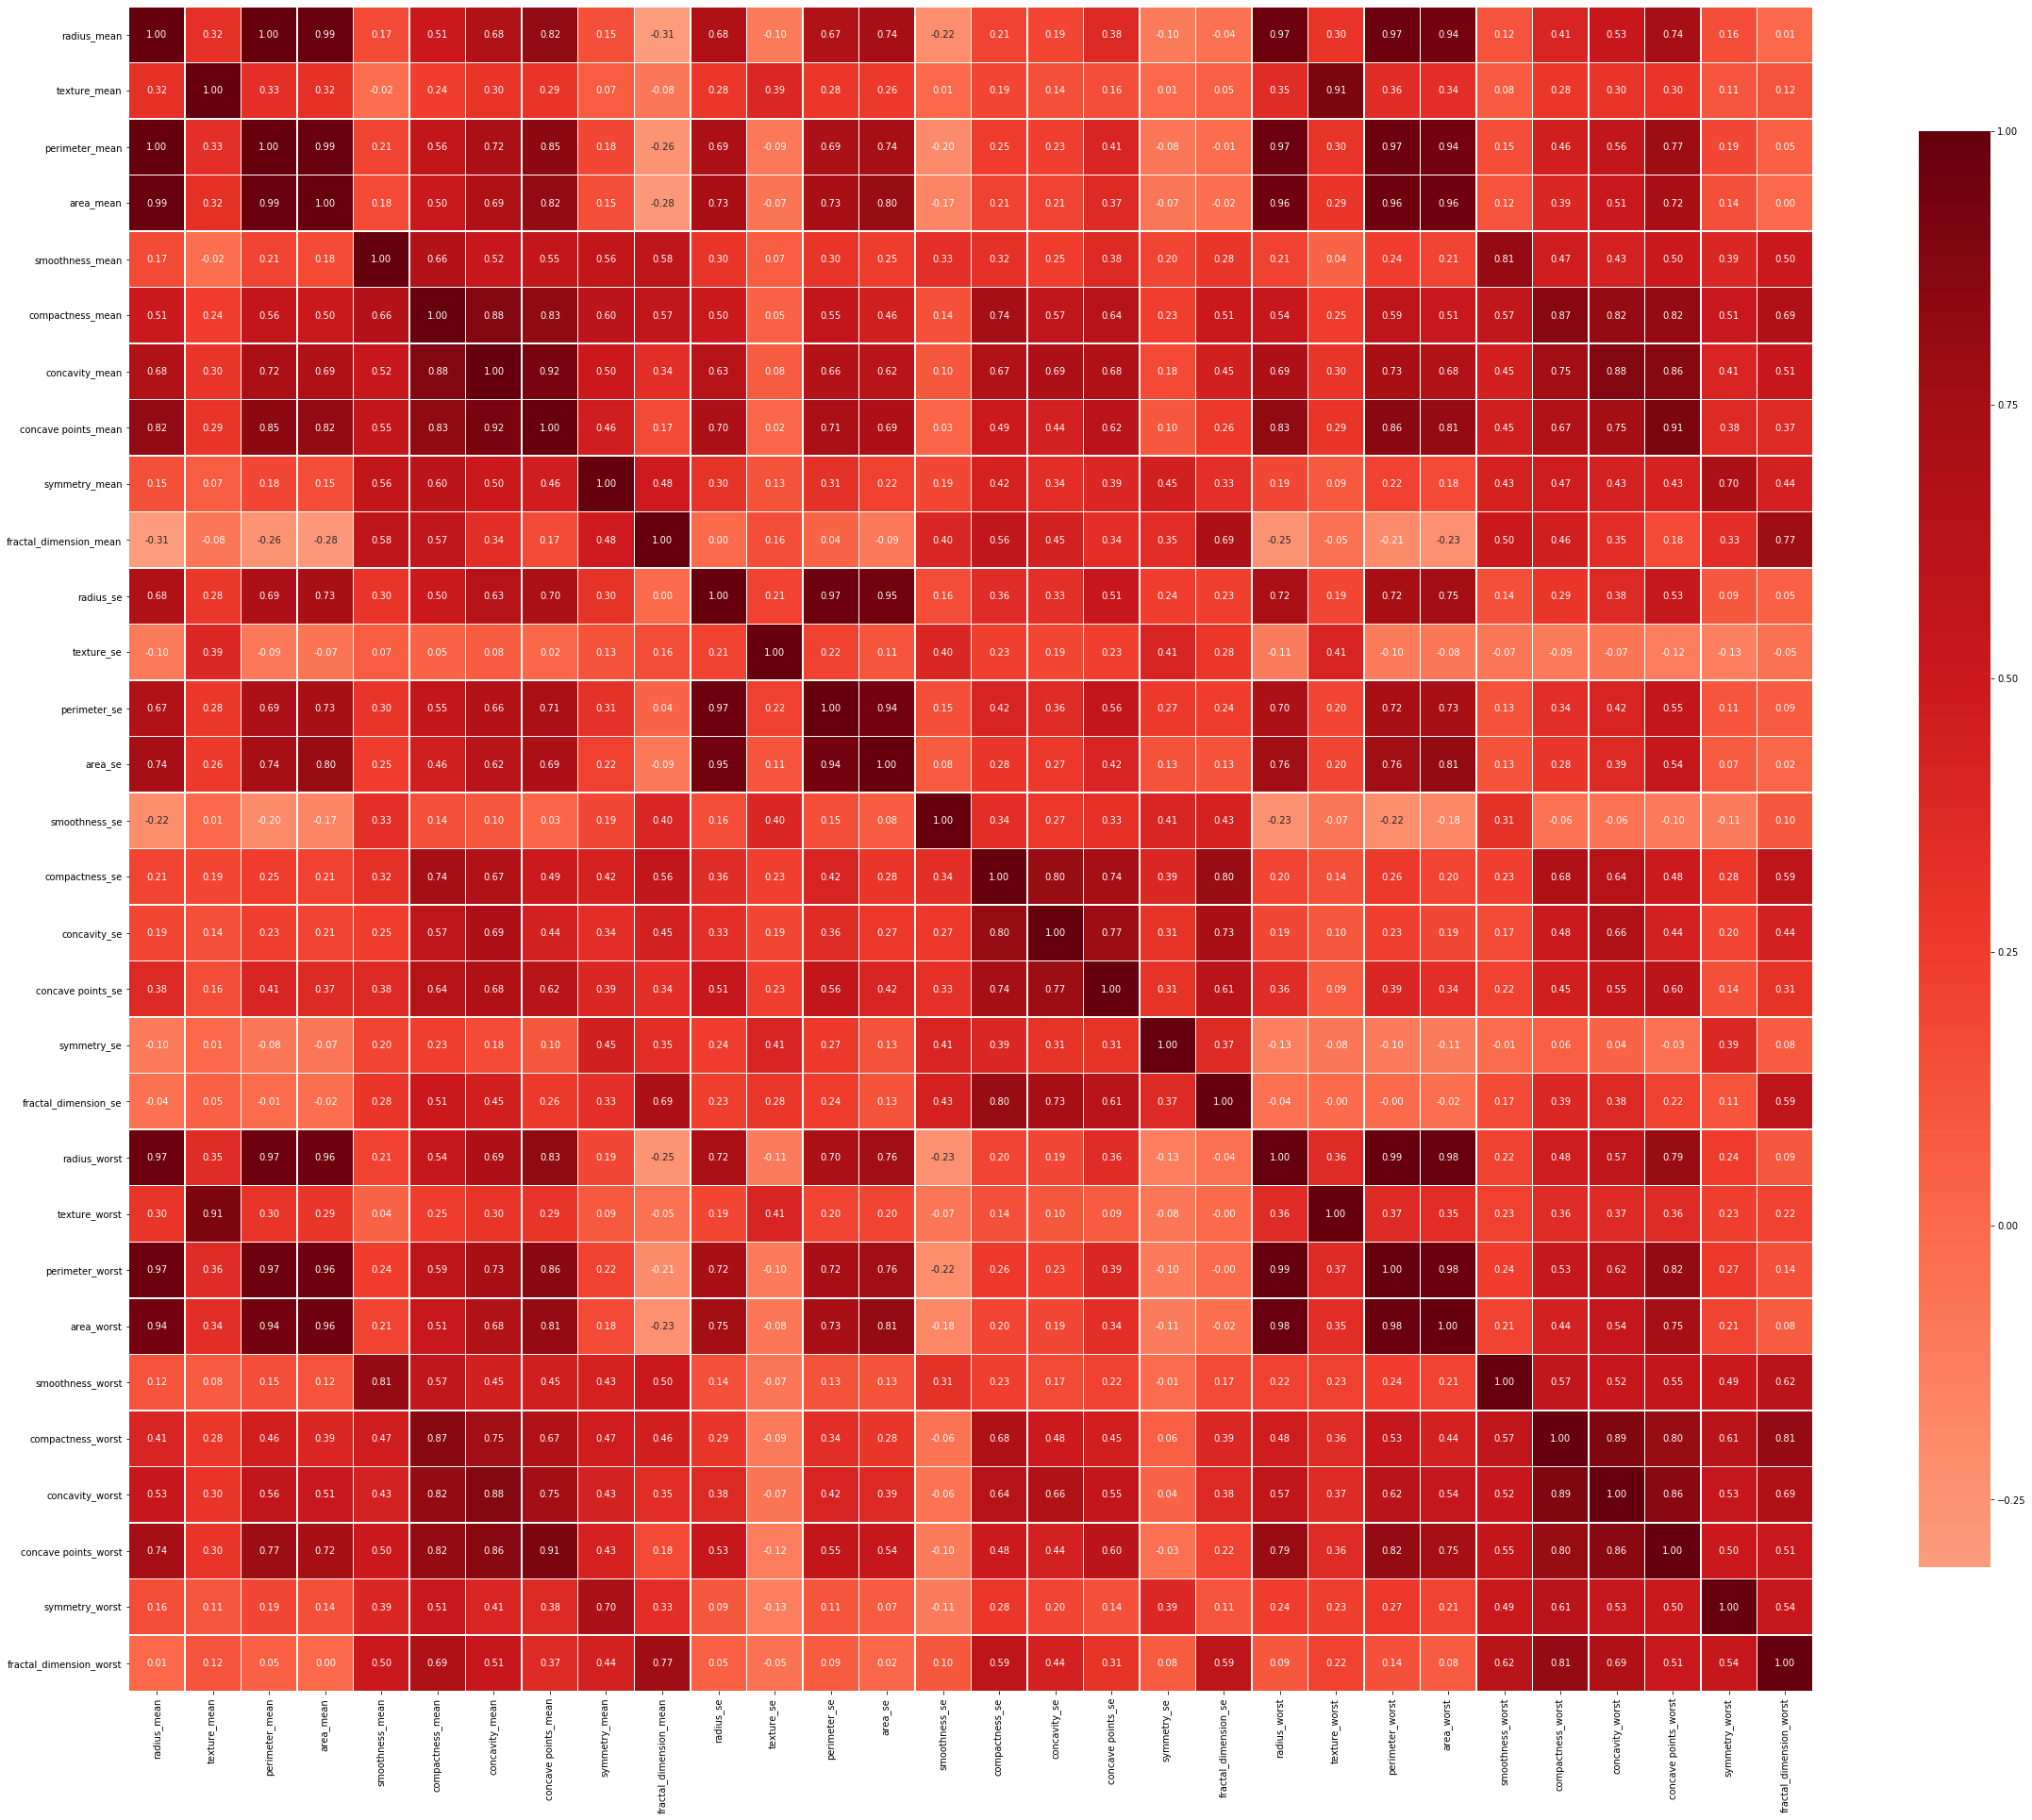

In [65]:
# code adapted from:
# https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4

import seaborn as sns

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(40,40))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True,
                cbar_kws={"shrink": .70}, cmap="Reds")
    plt.show();
    
correlation_heatmap(std_df)

In [66]:
# intuition: we want the feature with the darkest row/column above, because
# that feature predicts more variation in the dataset than any other feature

# we might rank feature importance as follows:
corr = std_df.corr()
corr.sum(axis=1).sort_values(ascending=False)

# on this ranking, concavity_mean is the most important feature

concavity_mean             17.569166
concave points_mean        17.087955
compactness_mean           16.856050
concave points_worst       16.270684
concavity_worst            15.487069
compactness_worst          14.552176
perimeter_worst            14.286758
perimeter_se               14.066210
radius_se                  13.650034
radius_worst               13.593105
perimeter_mean             13.572119
area_worst                 13.492283
concave points_se          13.315838
area_mean                  13.138745
compactness_se             13.134998
area_se                    12.943424
radius_mean                12.867710
concavity_se               11.646807
smoothness_mean            10.890318
symmetry_mean              10.826959
fractal_dimension_worst    10.370519
smoothness_worst            9.716331
symmetry_worst              9.123923
fractal_dimension_se        9.114869
texture_worst               7.728431
texture_mean                7.693712
fractal_dimension_mean      6.942490
s

In [67]:
# we want our second figure to be relatively independent of our first, so we
# want its correlation with concavity_mean to be low

corr['concavity_mean'].sort_values()

# since the first three results below seem to be the least important features
# in our list above, let's use the fourth result, texture_worst, for our
# second feature

texture_se                 0.076218
smoothness_se              0.098564
symmetry_se                0.178009
texture_worst              0.299879
texture_mean               0.302418
fractal_dimension_mean     0.336783
symmetry_worst             0.409464
smoothness_worst           0.448822
fractal_dimension_se       0.449301
symmetry_mean              0.500667
fractal_dimension_worst    0.514930
smoothness_mean            0.521984
area_se                    0.617427
radius_se                  0.631925
perimeter_se               0.660391
compactness_se             0.670279
area_worst                 0.675987
radius_mean                0.676764
concave points_se          0.683260
area_mean                  0.685983
radius_worst               0.688236
concavity_se               0.691270
perimeter_mean             0.716136
perimeter_worst            0.729565
compactness_worst          0.754968
concave points_worst       0.861323
compactness_mean           0.883121
concavity_worst            0

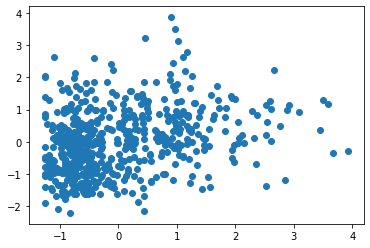

In [68]:
plt.scatter(std_df['concave points_mean'], std_df['texture_worst']);

In [69]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(std_df[['concave points_mean', 'texture_worst']])
labels = kmeans.labels_

new_series = pd.Series(labels)
std_df['clusters'] = new_series.values

std_df[['concave points_mean', 'texture_worst', 'clusters']]

,concave points_mean,texture_worst,clusters
0,2.532475,-1.359293,1
1,0.548144,-0.369203,0
2,2.037231,-0.023974,1
3,1.451707,0.133984,1
4,1.428493,-1.466770,0
5,0.824656,-0.313836,1
6,0.646935,0.322883,1
7,0.281950,0.401048,1
8,1.150692,0.822813,1
9,0.941760,2.443109,1


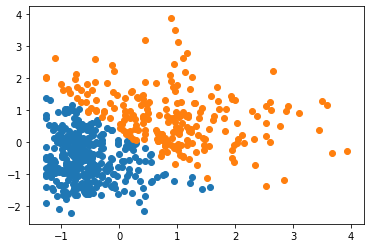

In [70]:
plt.scatter(std_df['concave points_mean'][std_df['clusters']==0], 
            std_df['texture_worst'][std_df['clusters']==0]);
plt.scatter(std_df['concave points_mean'][std_df['clusters']==1],
            std_df['texture_worst'][std_df['clusters']==1]);

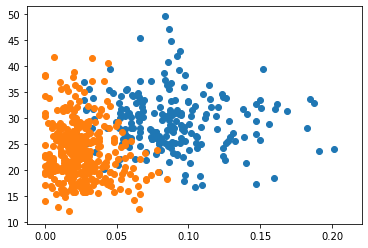

In [71]:
# now for the truth, using the labelled dataset:

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")

plt.scatter(df['concave points_mean'][df['diagnosis']=='M'],
            df['texture_worst'][df['diagnosis']=='M']);
plt.scatter(df['concave points_mean'][df['diagnosis']=='B'],
            df['texture_worst'][df['diagnosis']=='B']);

In [72]:
std_df_diagnosis = pd.concat([df, std_df['clusters']], axis=1)
pd.crosstab(std_df_diagnosis['diagnosis'], 
            columns=std_df_diagnosis['clusters'], normalize='index')

clusters,0,1
diagnosis,,
B,0.915966,0.084034
M,0.117925,0.882075


In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(std_df)

pc_df = pd.DataFrame(data=principal_components, columns=[
    'principal component 1', 'principal component 2'])

pc_df = pd.concat([df['id'], pc_df], axis=1)
pc_df

,id,principal component 1,principal component 2
0,842302,9.199200,1.980021
1,842517,2.345915,-3.742194
2,84300903,5.767768,-1.063989
3,84348301,7.132306,10.283704
4,84358402,3.877631,-1.910440
5,843786,2.421679,3.940280
6,844359,2.294408,-2.697335
7,84458202,2.189758,2.329832
8,844981,3.217385,3.382909
9,84501001,6.375474,7.727062


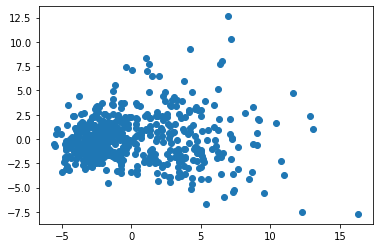

In [74]:
plt.scatter(pc_df['principal component 1'], pc_df['principal component 2']);

In [75]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(pc_df[['principal component 1', 'principal component 2']])
labels = kmeans.labels_

new_series = pd.Series(labels)
pc_df['clusters'] = new_series.values

pc_df[['principal component 1', 'principal component 2', 'clusters']]

,principal component 1,principal component 2,clusters
0,9.199200,1.980021,1
1,2.345915,-3.742194,1
2,5.767768,-1.063989,1
3,7.132306,10.283704,1
4,3.877631,-1.910440,1
5,2.421679,3.940280,1
6,2.294408,-2.697335,1
7,2.189758,2.329832,1
8,3.217385,3.382909,1
9,6.375474,7.727062,1


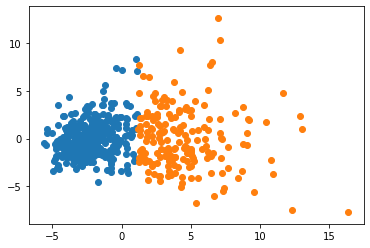

In [76]:
plt.scatter(pc_df['principal component 1'][pc_df['clusters']==0],
            pc_df['principal component 2'][pc_df['clusters']==0]);
plt.scatter(pc_df['principal component 1'][pc_df['clusters']==1],
            pc_df['principal component 2'][pc_df['clusters']==1]);

In [77]:
pc_df_diagnosis = pd.concat([df, pc_df['clusters']], axis=1)
pd.crosstab(pc_df_diagnosis['diagnosis'], columns=pc_df_diagnosis['clusters'],
            normalize='index')

# while this did increase our accuracy in predicting benign tumors, it 
# decreased our accuracy in predicting malignant ones - I did better when I 
# was just using concave points_mean and texture_worst without pca

clusters,0,1
diagnosis,,
B,0.963585,0.036415
M,0.174528,0.825472


# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.